## 2.1 Gradiente Descendiente Estocástico


In [1]:
! pip install numpy

DEPRECATION: Loading egg at c:\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [4]:
# Función polinómica de grado 3: 2 * x**3 - 3 * x**2 + 5 * x + 3
def polynomial_function(x):
    return np.polyval([2, -3, 5, 3], x)

def polynomial_function_u(x,coefficients):
   return np.polyval(coefficients, x)

# Derivada de la función polinómica
def gradient(x):
    return np.polyval([6, -6, 5], x)

In [5]:

#evitar que revienten los gradientes por overflowing, usando un valor max para clipping
#valor escojido de manera arbitraria, después de diversas iteraciones 0.5 es el mejor hallado
'''
se inició coon 1/8 de un valor máximo de un float 
a medida de aumentar las iteraciones fue reducido hasta un valor donde los fits no quedaran muy alejados
si , fue realizado a mano cada iteracion. 
'''
clipmax = 0.5
# Función para el descenso de gradiente estocástico
def stochastic_gradient_descent(learning_rate, epochs, x_values, y_true):
    coefficients = np.random.uniform(-5, 5, 4)  # Inicializar coeficientes aleatoriamente
    for epoch in range(epochs):
        for i in range(len(x_values)):
            x = x_values[i]
            y_pred = polynomial_function_u(x, coefficients)
            error = y_pred - y_true[i]
            gradient_value = gradient(x) * error
            gradient_value = np.clip(gradient_value,-clipmax,clipmax)
            for j in range(len(coefficients)):
                coefficients[j] = coefficients[j] - learning_rate * gradient_value * x**(3-j)
    return coefficients

# Función para el descenso de gradiente
def gradient_descent(learning_rate, epochs, x_values, y_true):
    coefficients = np.random.uniform(-5, 5, 4)  # Inicializar coeficientes aleatoriamente
    for epoch in range(epochs):
        y_pred = polynomial_function_u(x_values, coefficients)
        error = y_pred - y_true
        gradient_value = np.mean(gradient(x_values) * error[:, np.newaxis], axis=0)
        gradient_value = np.clip(gradient_value,-clipmax,clipmax)
        for j in range(len(coefficients)):
            coefficients[j] = coefficients[j] - learning_rate * gradient_value[j]
    return coefficients

# Función para el descenso de gradiente por mini-batches
def mini_batch_gradient_descent(learning_rate, epochs, batch_size, x_values, y_true):
    coefficients = np.random.uniform(-5, 5, 4)  # Inicializar coeficientes aleatoriamente
    for epoch in range(epochs):
        for i in range(0, len(x_values), batch_size):
            x_batch = x_values[i:i+batch_size]
            y_true_batch = y_true[i:i+batch_size]
            y_pred = polynomial_function_u(x_batch, coefficients)
            error = y_pred - y_true_batch
            gradient_value = np.mean(gradient(x_batch) * error[:, np.newaxis], axis=0)
            gradient_value = np.clip(gradient_value,-clipmax,clipmax)
            for j in range(len(coefficients)):
                coefficients[j] = coefficients[j] - learning_rate * gradient_value[j]
    return coefficients


In [6]:
# Función para calcular el fitness numéricamente (MSE)
def calculate_fitness(coefficients, x_values, y_true):
    y_predicted = np.polyval(coefficients, x_values)
    n = len(x_values)
    mse = np.sum((y_predicted - y_true)**2) / n
    return mse

# Función para calcular R-squared
def calculate_r_squared(coefficients, x_values, y_true):
    y_predicted = np.polyval(coefficients, x_values)
    ss_total = np.sum((y_true - np.mean(y_true))**2)
    ss_residual = np.sum((y_true - y_predicted)**2)
    r_squared = 1 - (ss_residual / ss_total)
    return r_squared


In [7]:
# Datos de entrada
x_values = np.linspace(-5, 5, 100)
y_true = polynomial_function(x_values)
learning_rate = 0.0015
epochs = 1000

In [8]:
# Descenso de gradiente estocástico

start_time = time.time()
coefficients_sgd = stochastic_gradient_descent(learning_rate, epochs, x_values, y_true)
sgd_time = time.time() - start_time
fitness_sgd = calculate_fitness(coefficients_sgd, x_values, y_true)

# Descenso de gradiente
start_time = time.time()
coefficients_gd = gradient_descent(learning_rate, epochs, x_values, y_true)
gd_time = time.time() - start_time
fitness_gd = calculate_fitness(coefficients_gd, x_values, y_true)

# Descenso de gradiente por mini lotes
start_time = time.time()
coefficients_mbgd = mini_batch_gradient_descent(learning_rate, epochs, 10, x_values, y_true)
mbgd_time = time.time() - start_time
fitness_mbgd = calculate_fitness(coefficients_mbgd, x_values, y_true)

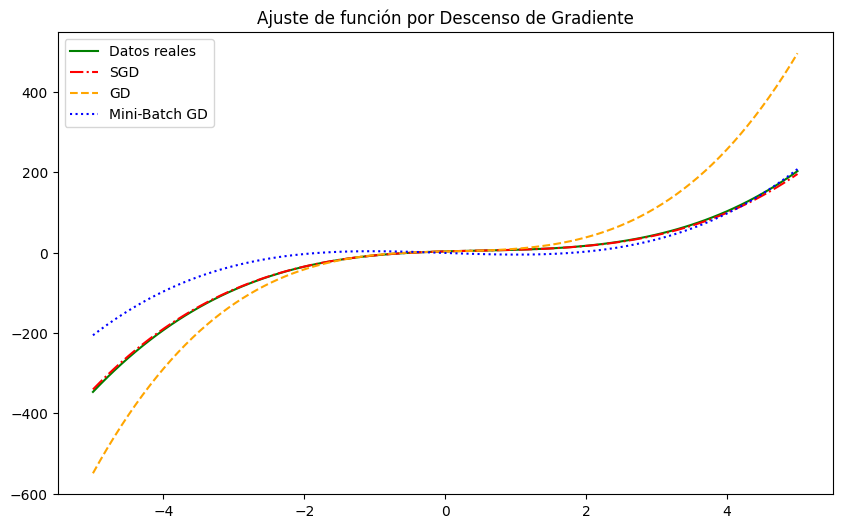

In [9]:
# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_true, label='Datos reales', color='green')
plt.plot(x_values, np.polyval(coefficients_sgd.tolist(), x_values), label='SGD', color='red',ls='-.')
plt.plot(x_values, np.polyval(coefficients_gd, x_values), label='GD', color='orange',ls='--')
plt.plot(x_values, np.polyval(coefficients_mbgd, x_values), label='Mini-Batch GD', color='blue',ls=':')
plt.ticklabel_format(style='scientific', axis='y')
plt.title('Ajuste de función por Descenso de Gradiente')
plt.legend()
plt.show()

In [10]:
# Mostrar resultados numéricos de tiempo y fitness
print("Results")
print(f'Tiempo de ejecución SGD: {sgd_time} segundos')
print(f'Tiempo de ejecución GD: {gd_time} segundos')
print(f'Tiempo de ejecución Mini-Batch GD: {mbgd_time} segundos')

print("\n---------------------------------------------\n")
print(f'Fitness SGD: MSE {fitness_sgd}')
print(f'Fitness GD: MSE {fitness_gd}')
print(f'Fitness Mini-Batch GD: MSE {fitness_mbgd}')
print("\n---------------------------------------------\n")
# Calculate R-squared for each method
r_squared_sgd = calculate_r_squared(coefficients_sgd, x_values, y_true)
r_squared_gd = calculate_r_squared(coefficients_gd, x_values, y_true)
r_squared_mbgd = calculate_r_squared(coefficients_mbgd, x_values, y_true)

# Print R-squared values
print(f'R-squared SGD: {r_squared_sgd}')
print(f'R-squared GD: {r_squared_gd}')
print(f'R-squared Mini-Batch GD: {r_squared_mbgd}')

Results
Tiempo de ejecución SGD: 2.2941176891326904 segundos
Tiempo de ejecución GD: 0.057218313217163086 segundos
Tiempo de ejecución Mini-Batch GD: 0.422013521194458 segundos

---------------------------------------------

Fitness SGD: MSE 6.666719108169712
Fitness GD: MSE 9594.28184902132
Fitness Mini-Batch GD: MSE 2403.0748825966944

---------------------------------------------

R-squared SGD: 0.999479625447856
R-squared GD: 0.25111287286575645
R-squared Mini-Batch GD: 0.8124266231244944


2.3-Perceptrón

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# CARGA DE CONJUNTO DE DATOS
iris = load_iris()
X = iris.data[:, :2] 
y = iris.target

# PARA SOLO TENER LAS 2 CLASES
filtro = y < 2
X, y = X[filtro], y[filtro]

# División de datos de entrenamiento y prueba
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(X, y, test_size=0.3, random_state=42)


class PerceptronModificado(object):
    def __init__(self, tasa_de_aprendizaje=0.01, numero_de_iteraciones=50):
        self.tasa_de_aprendizaje = tasa_de_aprendizaje
        self.numero_de_iteraciones = numero_de_iteraciones

    def fit(self, X, y):
        n_muestras, n_caracteristicas = X.shape
        self.pesos = np.zeros(n_caracteristicas + 1)
        self.errores_ = []

        for _ in range(self.numero_de_iteraciones):
            errores = 0
            for i in range(n_muestras):
                xi = X[i]
                objetivo = y[i]
                prediccion = self.predict(xi)
                error = objetivo - prediccion
                self.pesos[1:] += self.tasa_de_aprendizaje * error * xi
                self.pesos[0] += self.tasa_de_aprendizaje * error
                errores += int(error != 0.0)
            self.errores_.append(errores)
        return self

    def predict(self, X):
        z = np.dot(X, self.pesos[1:]) + self.pesos[0]
        return np.where(z >= 0, 1, 0)


perceptron = PerceptronModificado(tasa_de_aprendizaje=0.1, numero_de_iteraciones=10)
perceptron.fit(X_entrenamiento, y_entrenamiento)

# Evaluación de modelo
y_pred = perceptron.predict(X_prueba)
precision = accuracy_score(y_prueba, y_pred)


def visualizar_frontera(X, y, modelo):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                           np.arange(x2_min, x2_max, 0.02))
    Z = modelo.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=[cmap(idx)], marker=markers[idx], label=cl)

# Frontera de decisión
plt.figure(figsize=(10, 6))
visualizar_frontera(X_prueba, y_prueba, perceptron)
plt.xlabel('Longitud del sépalo')
plt.ylabel('Ancho del sépalo')
plt.title(f'Frontera de Decisión - Perceptrón Modificado (Precisión: {precision*100:.2f}%)')
plt.legend(loc='upper left')
plt.show()


El modelo alcanzó una precisión del 100% en el conjunto de prueba. Esto significa que el modelo fue capaz de clasificar correctamente todas las muestras de prueba, identificando correctamente si pertenecían a la clase 0 o la clase 1 basándose en la longitud y el ancho del sépalo.Se eligió esta metrica de desempeño debido a la simplicidad del problema y el balanceo de las clases.

Este alto nivel de precisión indica  que, para este conjunto de datos particular y las clases seleccionadas, el perceptrón modificado ha aprendido de manera efectiva la frontera de decisión entre las dos clases.

El alto rendimiento del perceptrón en la clasificación binaria del dataset de Iris se atribuye a características claras que diferencian las clases, un balance de clases que valida la precisión como métrica, y la simplicidad del problema, lo cual es óptimo para el perceptrón.

Ejercico 2.2

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import precision_score
from sklearn.feature_selection import SelectKBest, f_classif, chi2, mutual_info_classif

# Cargar el dataset
file_path = "high_diamond_ranked_10min.csv"  # Reemplaza con la ruta correcta a tu archivo
data = pd.read_csv(file_path)

# Eliminar la columna 'gameId'
data = data.drop(columns=['gameId'])

# Separar la variable objetivo y las caracteristicas
X = data.drop('blueWins', axis=1)
y = data['blueWins']

# Escalar las caracter�sticas al rango [0, 1]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de Regresion Logistica
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = logistic_model.predict(X_test)

# Evaluar el modelo original
precision_original = precision_score(y_test, y_pred)
print(f"Original Logistic Regression Model Precision: {precision_original}")

# Definir la m�trica de desempe�o (por ejemplo, precisi�n)
performance_metric = precision_score

# Definir las t�cnicas de selecci�n de caracter�sticas
feature_selection_techniques = [
    ('Univariate Selection (ANOVA F-statistic)', SelectKBest(f_classif, k=5)),
    ('Chi-squared', SelectKBest(chi2, k=5)),
    ('Mutual Information', SelectKBest(mutual_info_classif, k=5))
]

# Ajustar y evaluar el modelo para cada t�cnica de selecci�n de caracter�sticas
for name, selector in feature_selection_techniques:
    # Seleccionar caracter�sticas
    X_train_selected = selector.fit_transform(X_train, y_train)
    X_test_selected = selector.transform(X_test)

    # Crear y entrenar el modelo SVM
    svm_model = SVC()
    svm_model.fit(X_train_selected, y_train)

    # Realizar predicciones en el conjunto de prueba
    y_pred_svm = svm_model.predict(X_test_selected)

    # Evaluar el modelo
    performance = performance_metric(y_test, y_pred_svm)

    # Imprimir los resultados de la m�trica
    print(f"\nFeature Selection Technique: {name}")
    print(f"SVM Model Performance (Precision): {performance}")
    print(f"Selected Features Indices: {selector.get_support(indices=True)}")